In [11]:
# | eval: false
import pandas as pd
from datasets import Dataset, DatasetDict, load_dataset, load_from_disk

In [12]:
# | eval: false
path_ = '/home/stirunag/work/github/ML4-legal-documents/judgements_xml/'
dataset_path = path_+'en_judgements_dataset'
ds = load_from_disk(dataset_path)

df = ds.to_pandas()

In [13]:
df.head()

,_id,citation,signature,date,publicationDate,type,excerpt,content,judges,caseNumbers,citation_references,legislation,file_name,appeal_type,appeal_outcome,xml_uri,uri
0,ab0224364e4cf6562c82f8861d5268d4fa22b2ec45e0f7...,[2008] EWCA Crim 2952,EWCA_Crim_2952,None,2008-11-26,crown_court,No. 2008/03296/A9 2008/03350/A9 & 2008/03349/A...,No.\n2008/03296/A9\n2008/03350/A9\n&\n2008/033...,"[LORD JUSTICE TOULSON, MR JUSTICE MADDISON]","[2008/03296/A9, 2008/03349/A9, 2008/03350/A9]",None,None,2008_11_26-1736.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
1,d4630d93258ea51ecff4bc4015443b4eecf8d9b2e5b7c5...,[2006] EWCA Crim 3187,EWCA_Crim_3187,None,2006-12-19,supreme_court,Neutral Citation Number: [2006] EWCA Crim 3187...,Neutral Citation Number:\n[2006] EWCA Crim 318...,"[LORD JUSTICE PILL, MR JUSTICE HODGE]",[2003/06451/C4],None,None,2006_12_19-996.xml,conviction,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
2,37183a714b626cfe98081ac0250c804f992f340281f6d2...,[2012] EWCA Crim 1840,EWCA_Crim_1840,None,2012-08-08,crown_court,Neutral Citation Number: [2012] EWCA Crim 1840...,Neutral Citation Number:\n[2012] EWCA Crim 184...,"[LORD JUSTICE DAVIS, MR JUSTICE BURTON, MR JUS...",[201106042D2],"[[2008] UKHL 28, [2008] UKHL 29]","[that Act, Section 95(1), s.95(1), s.97, s.76(...",2012_08_08-3035.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
3,b41933b19505ab8767ce30faf8db9524f737ec5ac2c17e...,[2014] EWCA Crim 1730,EWCA_Crim_1730,None,2014-07-08,crown_court,Neutral Citation Number: [2014] EWCA Crim 1730...,Neutral Citation Number:\n[2014] EWCA Crim 173...,"[LORD JUSTICE TREACY, MR JUSTICE GRIFFITH WILL...",[201300932 C3],None,None,2014_07_08-3443.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
4,418382a2a6c0c32d3d2bd4cb7b39e1ba259dc6bf56a78e...,[2018] EWCA Crim 2189,EWCA_Crim_2189,None,2018-07-26,crown_court,No: 201802356 A2 Neutral Citation Number: [201...,No:\n201802356 A2\nNeutral Citation Number:\n[...,"[LORD JUSTICE SIMON, MRS JUSTICE CARR DBE]",[201802356 A2],None,None,2018_07_26-4369.xml,None,allowed,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...


In [14]:
# Convert publicationDate to datetime
df['publicationDate'] = pd.to_datetime(df['publicationDate'])

# Extract the publicationYear
df['publicationYear'] = df['publicationDate'].dt.year

# Calculate the length of tokens in content
df['contentTokenLength'] = df['content'].apply(lambda x: len(x.split()))

# Display the updated DataFrame
df.head()

,_id,citation,signature,date,publicationDate,type,excerpt,content,judges,caseNumbers,citation_references,legislation,file_name,appeal_type,appeal_outcome,xml_uri,uri,publicationYear,contentTokenLength
0,ab0224364e4cf6562c82f8861d5268d4fa22b2ec45e0f7...,[2008] EWCA Crim 2952,EWCA_Crim_2952,None,2008-11-26,crown_court,No. 2008/03296/A9 2008/03350/A9 & 2008/03349/A...,No.\n2008/03296/A9\n2008/03350/A9\n&\n2008/033...,"[LORD JUSTICE TOULSON, MR JUSTICE MADDISON]","[2008/03296/A9, 2008/03349/A9, 2008/03350/A9]",None,None,2008_11_26-1736.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...,2008,2229
1,d4630d93258ea51ecff4bc4015443b4eecf8d9b2e5b7c5...,[2006] EWCA Crim 3187,EWCA_Crim_3187,None,2006-12-19,supreme_court,Neutral Citation Number: [2006] EWCA Crim 3187...,Neutral Citation Number:\n[2006] EWCA Crim 318...,"[LORD JUSTICE PILL, MR JUSTICE HODGE]",[2003/06451/C4],None,None,2006_12_19-996.xml,conviction,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...,2006,3681
2,37183a714b626cfe98081ac0250c804f992f340281f6d2...,[2012] EWCA Crim 1840,EWCA_Crim_1840,None,2012-08-08,crown_court,Neutral Citation Number: [2012] EWCA Crim 1840...,Neutral Citation Number:\n[2012] EWCA Crim 184...,"[LORD JUSTICE DAVIS, MR JUSTICE BURTON, MR JUS...",[201106042D2],"[[2008] UKHL 28, [2008] UKHL 29]","[that Act, Section 95(1), s.95(1), s.97, s.76(...",2012_08_08-3035.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...,2012,7199
3,b41933b19505ab8767ce30faf8db9524f737ec5ac2c17e...,[2014] EWCA Crim 1730,EWCA_Crim_1730,None,2014-07-08,crown_court,Neutral Citation Number: [2014] EWCA Crim 1730...,Neutral Citation Number:\n[2014] EWCA Crim 173...,"[LORD JUSTICE TREACY, MR JUSTICE GRIFFITH WILL...",[201300932 C3],None,None,2014_07_08-3443.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...,2014,3515
4,418382a2a6c0c32d3d2bd4cb7b39e1ba259dc6bf56a78e...,[2018] EWCA Crim 2189,EWCA_Crim_2189,None,2018-07-26,crown_court,No: 201802356 A2 Neutral Citation Number: [201...,No:\n201802356 A2\nNeutral Citation Number:\n[...,"[LORD JUSTICE SIMON, MRS JUSTICE CARR DBE]",[201802356 A2],None,None,2018_07_26-4369.xml,None,allowed,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...,2018,1879


In [15]:
import matplotlib.pyplot as plt

In [16]:
# Create the 'images' directory if it does not exist
os.makedirs('images', exist_ok=True)

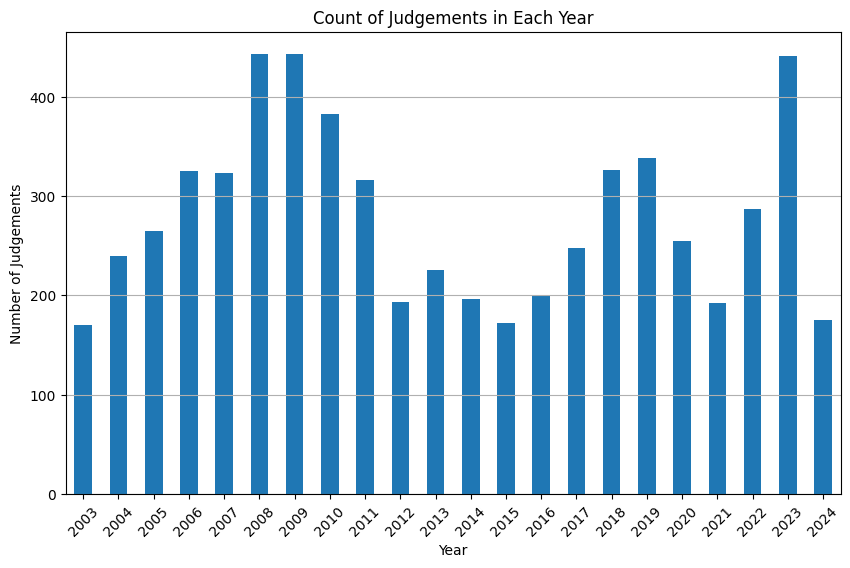

In [17]:
# Plotting
publication_counts = df['publicationYear'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
publication_counts.plot(kind='bar')
plt.title('Count of Judgements in Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Judgements')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Save the plot as a PNG file
plt.savefig('images/judgements_per_year.png', format='png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

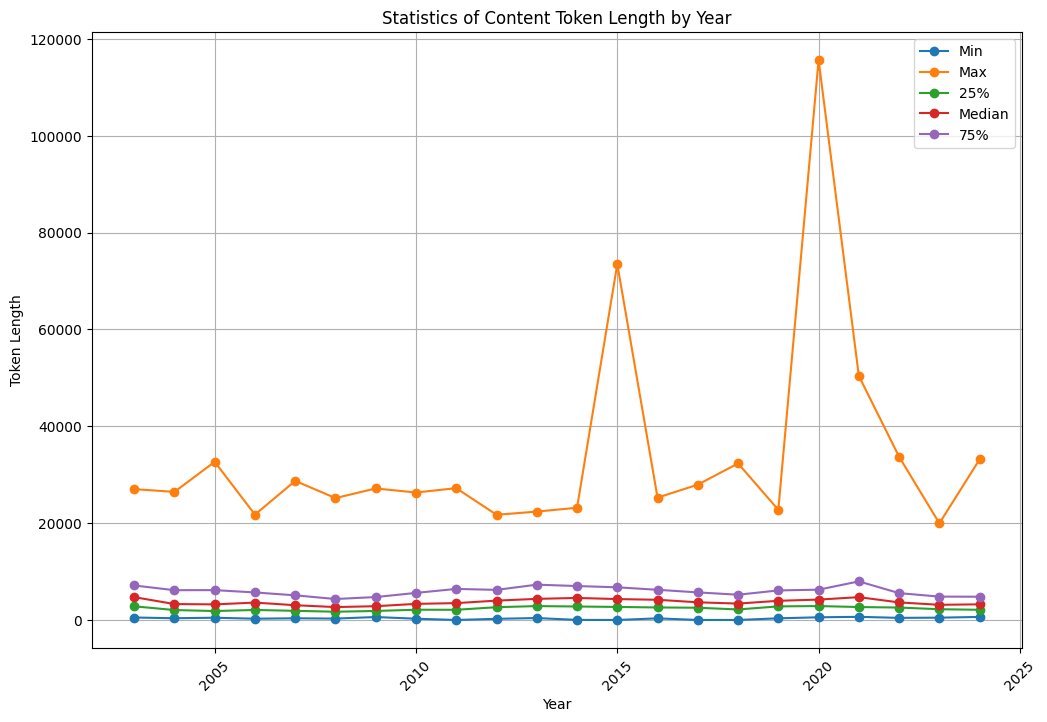

In [18]:
# Plotting
plt.figure(figsize=(12, 8))

# Group by year and calculate statistics
stats = df.groupby('publicationYear')['contentTokenLength'].describe(percentiles=[.25, .5, .75])


# Extracting the statistics for plotting
years = stats.index
min_values = stats['min']
max_values = stats['max']
q1_values = stats['25%']
median_values = stats['50%']
q3_values = stats['75%']

plt.plot(years, min_values, marker='o', linestyle='-', label='Min')
plt.plot(years, max_values, marker='o', linestyle='-', label='Max')
plt.plot(years, q1_values, marker='o', linestyle='-', label='25%')
plt.plot(years, median_values, marker='o', linestyle='-', label='Median')
plt.plot(years, q3_values, marker='o', linestyle='-', label='75%')

plt.title('Statistics of Content Token Length by Year')
plt.xlabel('Year')
plt.ylabel('Token Length')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Save the plot as a PNG file
plt.savefig('images/stats_token_length.png', format='png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

<Figure size 1200x800 with 0 Axes>

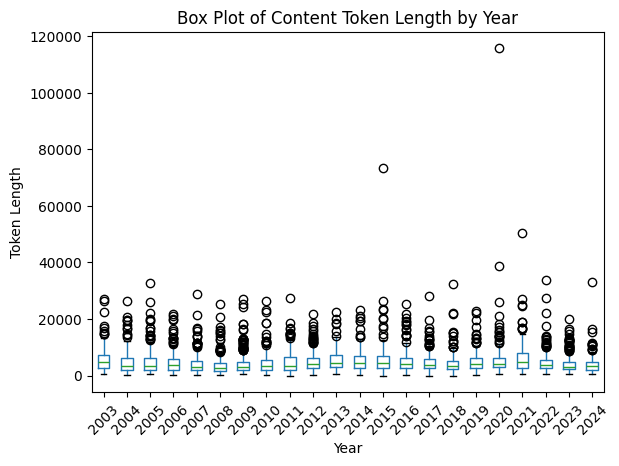

In [19]:
# Plotting the box plot for content token length by year
plt.figure(figsize=(12, 8))
df.boxplot(column='contentTokenLength', by='publicationYear', grid=False)
plt.title('Box Plot of Content Token Length by Year')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Year')
plt.ylabel('Token Length')
plt.xticks(rotation=45)

# Save the plot as a PNG file
plt.savefig('images/box_token_length.png', format='png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

In [16]:
# Function to extract closest rows for each statistic
def extract_stat_rows(df, stat):
    if stat == 'min':
        return df[df['contentTokenLength'] == df['contentTokenLength'].min()].iloc[0]
    elif stat == 'max':
        return df[df['contentTokenLength'] == df['contentTokenLength'].max()].iloc[0]
    elif stat == '25%':
        target = df['contentTokenLength'].quantile(0.25)
    elif stat == '50%':
        target = df['contentTokenLength'].median()
    elif stat == '75%':
        target = df['contentTokenLength'].quantile(0.75)
    
    # Find the closest value to the target
    closest_index = (df['contentTokenLength'] - target).abs().idxmin()
    return df.loc[closest_index]

# Group by year and apply the function
result = []
for year, group in df.groupby('publicationYear'):
    for stat in ['min', '25%', '50%', '75%', 'max']:
        row = extract_stat_rows(group, stat)
        result.append({
            'publicationYear': year,
            'stat': stat,
            'citation': row['citation']
        })

# Convert the result to a DataFrame
result_df = pd.DataFrame(result)

result_df

,publicationYear,stat,citation
0,2003,min,[2003] EWCA Crim 3
1,2003,25%,[2003] EWCA Crim 758
2,2003,50%,[2003] EWCA Crim 2243
3,2003,75%,[2003] EWCA Crim 1
4,2003,max,[2003] EWCA Crim 486
...,...,...,...
105,2024,min,[2024] EWCA Crim 36
106,2024,25%,[2024] EWCA Crim 108
107,2024,50%,[2024] EWCA Crim 238
108,2024,75%,[2024] EWCA Crim 544


In [17]:
# Checking for duplicate citations in the extracted DataFrame

# Check for duplicates in the 'citation' column
duplicate_citations = result_df[result_df.duplicated('citation', keep=False)]

# Display duplicate citations
duplicate_citations

,publicationYear,stat,citation


In [18]:
# Function to extract year and number from citation
def extract_url_from_citation(citation):
    parts = citation.split()
    year = parts[0].strip('[]')
    number = parts[-1]
    url = f"https://caselaw.nationalarchives.gov.uk/ewca/crim/{year}/{number}"
    return url

# Create URL column
result_df['url'] = result_df['citation'].apply(extract_url_from_citation)

# Display the result
result_df

,publicationYear,stat,citation,url
0,2003,min,[2003] EWCA Crim 3,https://caselaw.nationalarchives.gov.uk/ewca/c...
1,2003,25%,[2003] EWCA Crim 758,https://caselaw.nationalarchives.gov.uk/ewca/c...
2,2003,50%,[2003] EWCA Crim 2243,https://caselaw.nationalarchives.gov.uk/ewca/c...
3,2003,75%,[2003] EWCA Crim 1,https://caselaw.nationalarchives.gov.uk/ewca/c...
4,2003,max,[2003] EWCA Crim 486,https://caselaw.nationalarchives.gov.uk/ewca/c...
...,...,...,...,...
105,2024,min,[2024] EWCA Crim 36,https://caselaw.nationalarchives.gov.uk/ewca/c...
106,2024,25%,[2024] EWCA Crim 108,https://caselaw.nationalarchives.gov.uk/ewca/c...
107,2024,50%,[2024] EWCA Crim 238,https://caselaw.nationalarchives.gov.uk/ewca/c...
108,2024,75%,[2024] EWCA Crim 544,https://caselaw.nationalarchives.gov.uk/ewca/c...


In [19]:
import os

# Specify the path
path_ = '/home/stirunag/work/github/ML4-legal-documents/curation/'
save_csv_path = os.path.join(path_, 'dataset_curation_citations.csv')

# Create the directory if it does not exist
os.makedirs(path_, exist_ok=True)

# Save the result_df as a CSV file to the specified path
result_df.to_csv(save_csv_path, index=False)

save_csv_path

'/home/stirunag/work/github/ML4-legal-documents/curation/dataset_curation_citations.csv'

In [26]:
!git lfs install

Updated git hooks.
Git LFS initialized.


In [9]:
from huggingface_hub import login, HfApi, HfFolder
from huggingface_hub import login
import os




In [10]:
login()

In [24]:
# Authenticate to Hugging Face Hub
api = HfApi()
token = HfFolder.get_token()

# Specify the repository and the directory containing your images
repo_id = "JuDDGES/en-court-raw"
images_dir = "images/"


In [25]:
# List all .png files in the images directory
image_files = [f for f in os.listdir(images_dir) if f.endswith(".png")]

# Rename files to README_1_0.png, README_2_0.png, etc.
for idx, filename in enumerate(sorted(image_files), start=1):
    new_filename = f"README_{idx}_0.png"
    old_path = os.path.join(images_dir, filename)
    new_path = os.path.join(images_dir, new_filename)
    os.rename(old_path, new_path)

# Upload each image to Hugging Face Hub
for filename in sorted(os.listdir(images_dir)):
    if filename.endswith(".png"):
        image_path = os.path.join(images_dir, filename)
        api.upload_file(
            path_or_fileobj=image_path,
            path_in_repo=f"images/{filename}",
            repo_id=repo_id,
            repo_type="dataset",
            token=token
        )

print("Images renamed and uploaded successfully!")



README_1_0.png:   0%|          | 0.00/148k [00:00<?, ?B/s]

README_2_0.png:   0%|          | 0.00/86.1k [00:00<?, ?B/s]

README_3_0.png:   0%|          | 0.00/54.4k [00:00<?, ?B/s]

README_4_0.png:   0%|          | 0.00/45.6k [00:00<?, ?B/s]

README_5_0.png:   0%|          | 0.00/94.9k [00:00<?, ?B/s]

README_6_0.png:   0%|          | 0.00/242k [00:00<?, ?B/s]

README_7_0.png:   0%|          | 0.00/156k [00:00<?, ?B/s]

README_8_0.png:   0%|          | 0.00/124k [00:00<?, ?B/s]

README_9_0.png:   0%|          | 0.00/62.1k [00:00<?, ?B/s]

Images renamed and uploaded successfully!


In [28]:
import os
from huggingface_hub import HfApi, HfFolder

# Authenticate to Hugging Face Hub
api = HfApi()
token = HfFolder.get_token()

# Specify the repository
repo_id = "JuDDGES/en-court-raw"

# List files in the 'images' folder
files = api.list_repo_files(repo_id=repo_id, repo_type="dataset")
image_files = [f for f in files if f.startswith("images/")]

# Delete each file in the 'images' folder
for file in image_files:
    api.delete_file(
        path_in_repo=file,
        repo_id=repo_id,
        repo_type="dataset",
        token=token
    )

print("Files in the 'images' folder deleted successfully!")

# Rename and Upload Images to README_files folder
images_dir = "images/"  # Update the path to the cloned repository

# List all .png files in the local images directory
local_image_files = [f for f in os.listdir(images_dir) if f.endswith(".png")]

# Rename files to README_1_0.png, README_2_0.png, etc.
for idx, filename in enumerate(sorted(local_image_files), start=1):
    new_filename = f"README_{idx}_0.png"
    old_path = os.path.join(images_dir, filename)
    new_path = os.path.join(images_dir, new_filename)
    os.rename(old_path, new_path)

# Upload each image to Hugging Face Hub into the README_files folder
for filename in sorted(os.listdir(images_dir)):
    if filename.endswith(".png"):
        image_path = os.path.join(images_dir, filename)
        api.upload_file(
            path_or_fileobj=image_path,
            path_in_repo=f"README_files/{filename}",
            repo_id=repo_id,
            repo_type="dataset",
            token=token
        )

print("Images renamed and uploaded to README_files folder successfully!")


Files in the 'images' folder deleted successfully!
Images renamed and uploaded to README_files folder successfully!
